<a href="https://colab.research.google.com/github/h0806449f/PyTorch/blob/main/DB_04_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **=== 0. Pytorch Domain Libraries ===**
1. Info
    https://pytorch.org/blog/new-library-updates-in-pytorch-2.0/
2. To do list
    1. torch vision : https://pytorch.org/vision/stable/
    2. torch audio : https://pytorch.org/audio/stable/
    3. torch rec : https://pytorch.org/torchrec/

In [1]:
import torch
from torch import nn

torch.__version__

'2.0.1+cu118'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# **=== 1. Get data ===**
1. 原資料集 : Food 101
    1. 101 classes
    2. 1000 images
2. 截取部分資料及內容 :
    1. https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb
    2. 3 classes
    3. 10% - 20% images of food 101

In [3]:
import requests
import zipfile
from pathlib import Path

# 設置資料路徑
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# 判斷資料夾存在與否
if image_path.is_dir():
    print(f"{image_path} directory already exist, skipping download")
else:
    print(f"{image_path} doesn't exist, creating")
    image_path.mkdir(parents=True, exist_ok=True)

# 下載壓縮檔
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

# 解壓縮
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping the file")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi doesn't exist, creating
Unzipping the file


# 1.1 檢視資料結構
1. 注意資料夾與資料結構
2. train
    3 floders of different type images
3. test
    3 floders of different type images

In [9]:
# Walk function
import os

def walk_through_dir(dir_path):
    """Walk through dir_path, returning the content in it"""

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} dirs and {len(filenames)} images in {dirpath}.")

In [15]:
# 資料結構
walk_through_dir(image_path)

There are 2 dirs and 0 images in data/pizza_steak_sushi.
There are 3 dirs and 0 images in data/pizza_steak_sushi/train.
There are 0 dirs and 72 images in data/pizza_steak_sushi/train/sushi.
There are 0 dirs and 75 images in data/pizza_steak_sushi/train/steak.
There are 0 dirs and 78 images in data/pizza_steak_sushi/train/pizza.
There are 3 dirs and 0 images in data/pizza_steak_sushi/test.
There are 0 dirs and 31 images in data/pizza_steak_sushi/test/sushi.
There are 0 dirs and 19 images in data/pizza_steak_sushi/test/steak.
There are 0 dirs and 25 images in data/pizza_steak_sushi/test/pizza.


In [14]:
# 圖片位置
print(image_path)

data/pizza_steak_sushi


In [16]:
# Setup training and testing paths

train_dir = image_path / "train"
test_dir = image_path / "test"

print(f"train 路徑: {train_dir}")
print(f"test 路徑: {test_dir}")

train 路徑: data/pizza_steak_sushi/train
test 路徑: data/pizza_steak_sushi/test


# 1.2 檢視圖片

1. Get all of the image "path"
2. Pick random image path  (`random.choice()`)
3. Get image class name  (`pathlib.Path.parent.stem`)
4. Open image  (`PIL`)
5. Show image and print info

In [21]:
# 1. Get all image path
import random
from PIL import Image

# 設置 random seed
random.seed(42)

# "path" list
# image_path -> content/data/pizza_steak_sushi

image_path_list = list(image_path.glob("*/*/*.jpg"))  # 注意層數

In [22]:
# 2. Random pick
random_image_path = random.choice(image_path_list)
random_image_path

PosixPath('data/pizza_steak_sushi/train/sushi/170385.jpg')

In [24]:
# 3. Get image class name
image_class = random_image_path.parent.stem
image_class

'sushi'

In [26]:
# 額外 : 如要選取路經中的檔案名稱
file_name = random_image_path.name
file_name

'170385.jpg'

In [28]:
# 4. Show image
img = Image.open(random_image_path)

圖片路徑: data/pizza_steak_sushi/train/sushi/170385.jpg
圖片類別: sushi | 名稱: 170385.jpg


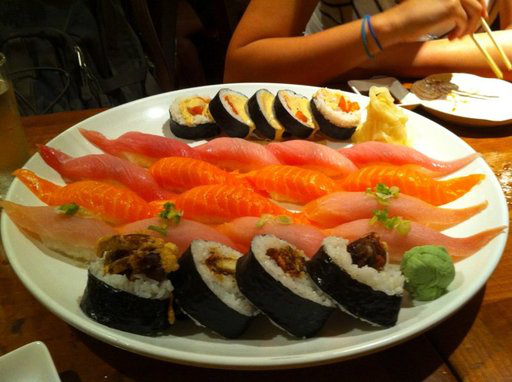

In [29]:
# 5. Show image and image_info
print(f"圖片路徑: {random_image_path}")
print(f"圖片類別: {image_class} | 名稱: {file_name}")
img

# **=== 2. 資料預處理 ===**

PyTorch 需要的資料型態 **tensor**
1. Trun target data into tensors
2. Trun it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`
  in short `Dataset` and `DataLoader`.